<a href="https://colab.research.google.com/github/AbhiJ-lab/Computational-Biology-Hub-Projects/blob/main/_2class_RF_QSAR_web_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR Model Building of PARP-1 Inhibitors**

Abhiram Jyosyula

# Read in data

In [ ]:
import pandas as pd

In [ ]:

dataset = pd.read_csv('PARP1_06_bioactivity_data_2class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.698970
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.522879
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455932
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823909
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.337242
2819,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.705534
2820,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.096910
2821,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.096910


In [ ]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2819,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2820,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2821,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.iloc[:,-1]
Y

0       7.698970
1       7.522879
2       7.455932
3       7.823909
4       7.301030
          ...   
2818    8.337242
2819    6.705534
2820    8.096910
2821    9.096910
2822    7.876148
Name: pIC50, Length: 2823, dtype: float64

# Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,...,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821
0,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,1,1,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,1
2819,1,1,1,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2820,1,1,1,1,1,0,0,0,0,0,...,1,1,1,0,0,1,0,1,1,1
2821,1,1,0,0,0,1,0,1,1,1,...,1,0,1,1,0,0,1,1,0,1


In [ ]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8300865232486805

## Model Prediction

In [ ]:
Y_pred = model.predict(X)
Y_pred

array([7.31268666, 7.11847462, 7.4179105 , ..., 7.47405753, 8.04346032,
       7.90789115])

## Model Performance

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.28
Coefficient of determination (R^2): 0.83


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

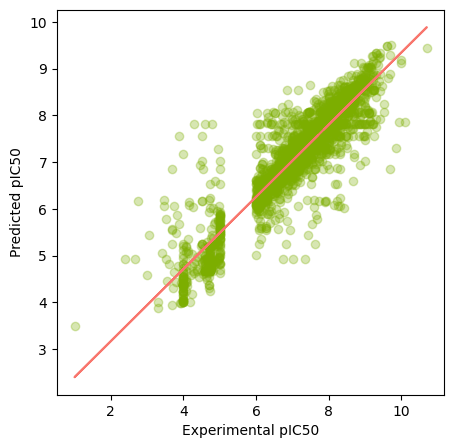

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('2class_PARP1_RandomForest_model.pkl', 'wb'))